In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

from model import *

import json

In [2]:
# set model in python

Nx = 101
Ny = 81
dx, dy = 0.01, 0.01
Nt = 1001
dt = 0.001
pml_len = 30
pml_alpha = 20


m = Mesh(Nx, Ny, dx, dy)
t = Time(Nt, dt)
a = Acquisition(3, [[i,5] for i in range(3)],
                10, [[i,0] for i in range(10)])
c = np.ones([101,81])
rho = np.ones([101,81])

model = ModelPML(m, t, c, rho, a, pml_len, pml_alpha)

model.writeModel()



In [7]:
model.__dict__

{'Nx': 101,
 'Ny': 81,
 'dx': 0.01,
 'dy': 0.01,
 'Nt': 1001,
 'dt': 0.001,
 'c': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 'rho': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 'source_num': 3,
 'source_position': array([[0, 5],
        [1, 5],
        [2, 5]]),
 'receiver_num': 10,
 'receiver_position': array([[0, 0],
        [1, 0],
        [2, 0],
        [3, 0],
        [4, 0],
        [5, 0],
        [6, 0],
        [7, 0],
        [8, 0],
        [9, 0]]),
 'c_inv': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.

In [4]:
# solver

top = time.time()
os.system("./solver")
bottom = time.time()

print((bottom - top))

0.01919865608215332


terminate called after throwing an instance of 'nlohmann::json_abi_v3_11_2::detail::type_error'
  what():  [json.exception.type_error.302] type must be number, but is null
Aborted


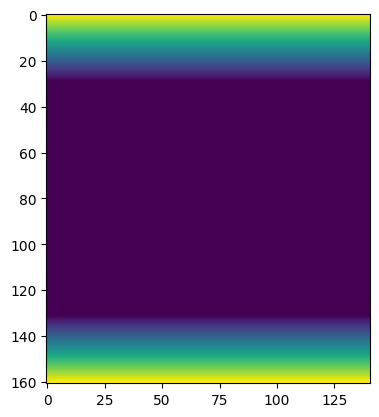

In [5]:
plt.imshow(model.sigma_x)

In [6]:
# read

f = open('./data/temp_cpp.json')
data = json.load(f)
f.close()

u2 = np.array(data["u2"]).reshape(Nx+2*pml_len, Ny+2*pml_len)

ValueError: cannot reshape array of size 25921 into shape (161,141)

In [ ]:
u2 = np.array(data["u2"])

In [ ]:
model.c_pml.shape

(161, 141)

In [ ]:
161 * 141

22701